# Math 104B Homework 5
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1
$$ -u''(x) + \pi^2\cos^2(\pi x)u(x) = f(x) \quad x\in[0,1]$$
With boundary conditions:
$$u(x) = 0 \\ u(1) = 0$$

#### 1a
Given $f(x) = \pi^2\sin(\pi x)\cosh(\sin(\pi x))$, let's check if $u(x) = \sinh(sin(\pi x))$ is the solution to the boundary value problem. First, find $u''(x)$ with the given $u(x)$. <br/>
$u'(x)$
> $u'(x) = \pi\cos(\pi x)\cosh(\sin(\pi x))$ 

$u''(x)$
>$u''(x) = \pi^2[\cos^2(\pi x)\sinh(\sin(\pi x)) - \sin(\pi x)\cosh(\sin(\pi x))]$

Now, rewrite the equation subsituting the given and found values. 
$$-\pi^2[\cos^2(\pi x)\sinh(\sin(\pi x)) - \sin(\pi x)\cosh(\sin(\pi x))] + \pi^2\cos^2(\pi x)\sinh(sin(\pi x)) = \pi^2\sin(\pi x)\cosh(\sin(\pi x))$$
Simplify.
>$= \pi^2[-\cos^2(\pi x)\sinh(\sin(\pi x)) + \sin(\pi x)\cosh(\sin(\pi x)) + \cos^2(\pi x)\sinh(\sin(\pi x)) = \pi^2 \sin(\pi x)\cosh(\sin(\pi x))$ <br>
$= \sin(\pi x)\cosh(\sin(\pi x)) = \sin(\pi x)\cosh(\sin(\pi x))$

It is clear from simplifying the equation that the RHS = LHS. Now, let's check if $u(x)$ meets the boundary conditions. 

$u(0)$
> $u(0) = \sinh(sin(0)) = \sinh(0) = 0$ <br />
  
$u(1)$
> $u(1) = \sinh(sin(\pi)) = \sinh(0) = 0$

Therefore, the given $u(x)$ meets boundary conditions and is the solution for our BVP. 

#### 1b
In the cell below I will modify the code in the notes to numerically solve the equation and show numerically that the approximation is $O(h^2)$. From the results of the program, we can see that our alpha values is two and is correct. 

#### 1c
In the cell two below I will program the Jacobi and Gauss-Seidel methods applied to the problem. After running the two different methods, I noticed that the number of iterations for Gauss-Seidel is about half as much as Jacobi. 

           h |              Error |       alpha
-------------+--------------------+-------------
 1.00000e-01 | 1.180399229459e-02 | 0.00000e+00
 5.00000e-02 | 2.907198598437e-03 | 2.02157e+00
 2.50000e-02 | 7.241609889257e-04 | 2.00525e+00
 1.25000e-02 | 1.808767959219e-04 | 2.00130e+00
 6.25000e-03 | 4.520900592220e-05 | 2.00033e+00
 3.12500e-03 | 1.130161477669e-05 | 2.00008e+00
 1.56250e-03 | 2.825363628389e-06 | 2.00002e+00
 7.81250e-04 | 7.063391784801e-07 | 2.00000e+00
\begin{tabular}{rrr}
\hline
           h &              Error &       alpha \\
\hline
 1.00000e-01 & 1.180399229459e-02 & 0.00000e+00 \\
 5.00000e-02 & 2.907198598437e-03 & 2.02157e+00 \\
 2.50000e-02 & 7.241609889257e-04 & 2.00525e+00 \\
 1.25000e-02 & 1.808767959219e-04 & 2.00130e+00 \\
 6.25000e-03 & 4.520900592220e-05 & 2.00033e+00 \\
 3.12500e-03 & 1.130161477669e-05 & 2.00008e+00 \\
 1.56250e-03 & 2.825363628389e-06 & 2.00002e+00 \\
 7.81250e-04 & 7.063391784801e-07 & 2.00000e+00 \\
\hline
\end{tabular}


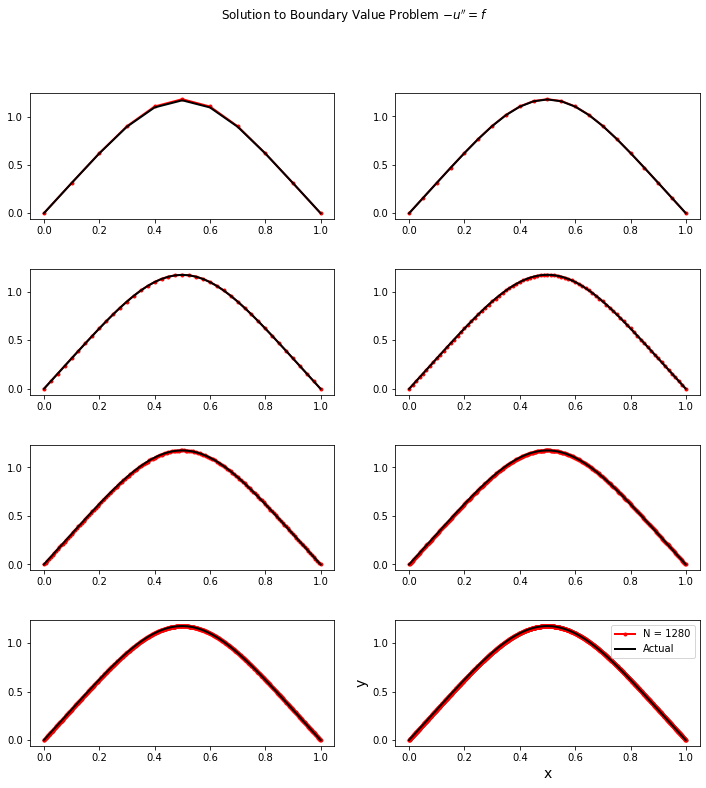

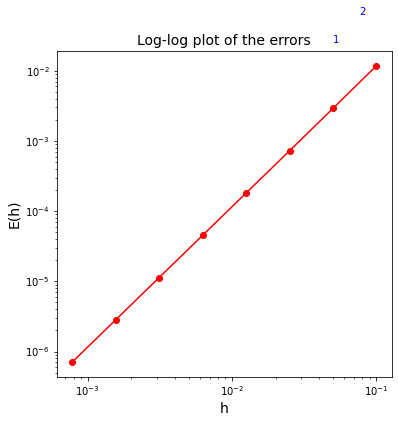

In [1]:
#code for 1b

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import numpy as np
import time

from tabulate import tabulate
from mpltools import annotation
from math import *


NSamples = 8
colors   = cm.rainbow(np.linspace(0, 1, NSamples))
error    = np.zeros(NSamples)
n        = np.zeros(NSamples,dtype='int')
h        = np.zeros(NSamples)
alpha    = np.zeros(NSamples)
fig, ax  = plt.subplots(nrows=floor(NSamples/2),ncols=2,figsize=(12,12))

plt.subplots_adjust(hspace=.4)
fig.suptitle('Solution to Boundary Value Problem $-u\'\'=f$')

for k in range(NSamples):
    n[k]      = 10*2**k
    h[k]      = 1/n[k]
    x         = np.arange(n[k]+1) * h[k]
    e         = np.ones(n[k]-1)
    y         = np.zeros(n[k]+1)
    A         = sp.spdiags(np.array([-e/(h[k]**2), 2*e/(h[k]**2) + (np.cos(np.pi*x[1:-1])**2)*(np.pi**2), 
                                     -e/(h[k]**2)]), np.array([-1, 0, 1]), n[k]-1, n[k]-1, format = 'csr')
    sol       = np.sinh(np.sin(np.pi*x))                            #u(x), Actual Solution
    b         = (np.pi**2)*np.sin(np.pi*x)*np.cosh(np.sin(np.pi*x)) #f(x)
    b[1]      = b[1] + sol[0]/h[k]**2
    b[n[k]-1] = b[n[k]-1] + sol[n[k]]/h[k]**2
    
    start = time.time()
    
    # Elimination step
    y[1:n[k]] = spla.spsolve(A, b[1:n[k]])
    y[0]      = sol[0]
    y[n[k]]   = sol[n[k]]
    
    end = time.time()
    
    error[k] = max(abs(y - sol))
    
    if k > 0:
        alpha[k] = log(error[k]/error[k-1])/log(h[k]/h[k-1])
    ax[floor(k/2),k%2].plot(x,y,'.-',color='red', label='N = %i' %n[k],lw=2)
    ax[floor(k/2),k%2].plot(x,sol,'-',color='black', label='Actual',lw=2)
    
ax[floor(k/2),k%2].legend(loc='best')
ax[floor(k/2),k%2].set_xlabel('x',fontsize=14)
ax[floor(k/2),k%2].set_ylabel('y',fontsize=14)
plt.savefig('BVP.png', bbox_inches='tight')
results = [(h[i], error[i], alpha[i]) for i in range(NSamples)]

print(tabulate(results, headers=["h", "Error", "alpha"], floatfmt=(".5e",".12e",".5e"),tablefmt="presto"))
print(tabulate(results, headers=["h", "Error", "alpha"], floatfmt=(".5e",".12e",".5e"),tablefmt="latex"))

fig, ax = plt.subplots(figsize=(6,6))
ax.loglog(h,error,'or-')
annotation.slope_marker((4e-2, 4.e-2), (2, 1), ax=ax,text_kwargs={'color': 'blue'},poly_kwargs={'facecolor': 'blue'})

ax.set_xlabel('h',fontsize=14)
ax.set_ylabel('E(h)',fontsize=14)
ax.set_title('Log-log plot of the errors',fontsize=14)

plt.rc('xtick', labelsize=14) # fontsize of the tick labels
plt.rc('ytick', labelsize=14)
plt.savefig('BVP-errors.png', bbox_inches='tight')
plt.show()

10
20
40
80
160
320
[157, 561, 1975, 6816, 22924, 74331]
[86, 305, 1080, 3772, 12911, 42955]


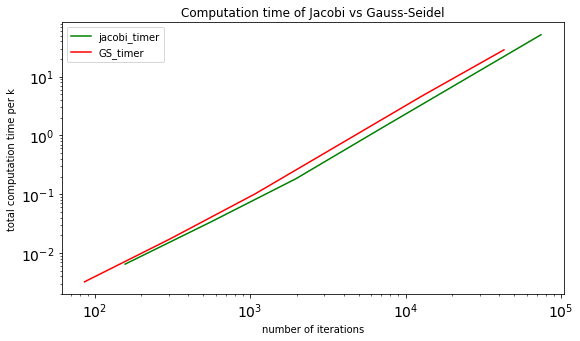

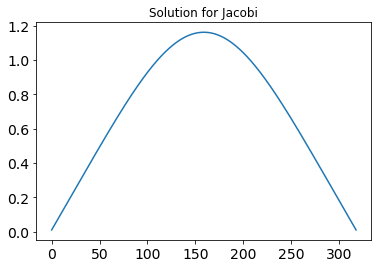

<function matplotlib.pyplot.show(*args, **kw)>

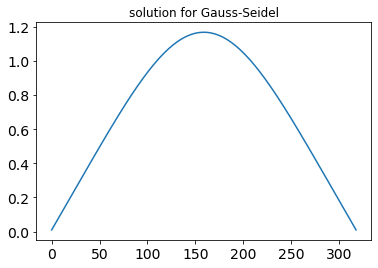

In [2]:
#code for 1c

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import numpy as np
import time

from tabulate import tabulate
from mpltools import annotation
from math import *


NSamples = 6
colors   = cm.rainbow(np.linspace(0, 1, NSamples))
error    = np.zeros(NSamples)
n        = np.zeros(NSamples,dtype='int')
h        = np.zeros(NSamples)
alpha    = np.zeros(NSamples)


def jacobi(A, b, nk):
    print(nk)
    initial_vectors = [] #0 vectors 
    jac_arr         = []
    count           = 1
    
    #find initial fix for vector array 
    for i in range(len(b)):
        initial_vectors.append((1/A[i][i]) * b[i])
        
    jac_arr.append(initial_vectors)
        
    #populate based on our initial starting guess 
    while True:
        x_j = []
        for i in range(len(b)):
            if i == 0: #first row, two on diagonal 
                sigma = A[i][i+1]*jac_arr[-1][i+1]
                
            elif i == len(b)-1: #last row, two on diagonal 
                sigma = A[i][i-1]*jac_arr[-1][i-1]
                
            else: #three on diagonal 
                sigma = A[i][i+1]*jac_arr[-1][i+1] + A[i][i-1]*jac_arr[-1][i-1]
                
            x_j.append((1/A[i][i] * (b[i] - sigma)))
            
        count += 1
        jac_arr.append(x_j)
        
        if np.linalg.norm(np.array(jac_arr[-1]) - np.array(jac_arr[-2])) < 10**-5:
            break
            
    return count, jac_arr[-1]

def gauss(A, b):
    initial_vectors = []
    gs_arr          = []
    count           = 1
    
    x_gs = np.zeros(len(b))
    x = x_gs.copy()
    while True:
        for i in range(len(b)):
            if i == 0:
                x_gs[i] = ((1/A[i][i]) * (b[i] - A[i][i+1] * x_gs[i+1]))
            elif i == len(b)-1:
                x_gs[i] = ((1/A[i][i]) * (b[i] - A[i][i-1] * x_gs[i-1]))
            else:
                x_gs[i] = ((1/A[i][i]) * (b[i] - A[i][i+1] * x_gs[i+1] - A[i][i-1] * x_gs[i-1]))
                
        count += 1
        err = np.linalg.norm(x_gs - x)
        x = x_gs.copy()
        if err < 10**-5:
            break
        
    return count, x
                
    
jacobi_timer    = []
jacobi_counter  = [] 
GS_timer        = []
GS_counter      = []
jacobi_solution = []
GS_solution     = []
for k in range(NSamples):
    n[k]      = 10*2**k
    h[k]      = 1/n[k]
    x         = np.arange(n[k]+1) * h[k]
    e         = np.ones(n[k]-1)
    y         = np.zeros(n[k]+1)
    A         = sp.spdiags(np.array([-e/(h[k]**2), 2*e/(h[k]**2) + (np.cos(np.pi*x[1:-1])**2)*(np.pi**2), 
                                     -e/(h[k]**2)]), np.array([-1, 0, 1]), n[k]-1, n[k]-1, format = 'csr').toarray()
    sol       = np.sinh(np.sin(np.pi*x))                            #u(x), Actual Solution
    b         = (np.pi**2)*np.sin(np.pi*x)*np.cosh(np.sin(np.pi*x)) #f(x)
    b[1]      = b[1] + sol[0]/h[k]**2
    b[n[k]-1] = b[n[k]-1] + sol[n[k]]/h[k]**2
    
    #jacobi time log
    start = time.time()
    count, vec = jacobi(A, b[1:n[k]], n[k])
    jacobi_timer.append(time.time() - start)
    jacobi_counter.append(count)
    jacobi_solution.append(vec)
    
    #GS time log
    start = time.time()
    count_gs, vec_gs = gauss(A, b[1:n[k]])
    GS_timer.append(time.time() - start)
    GS_counter.append(count_gs)
    GS_solution.append(vec_gs)
    
print(jacobi_counter)
print(GS_counter)
figure(figsize=(9,5))
k = np.arange(8)
plt.loglog(jacobi_counter, jacobi_timer, label = "jacobi_timer", color = 'green')
plt.loglog(GS_counter, GS_timer, label = "GS_timer", color = 'red')
plt.xlabel("number of iterations")
plt.ylabel("total computation time per k")
plt.title("Computation time of Jacobi vs Gauss-Seidel")
plt.legend()
plt.show()
plt.plot(jacobi_solution[-1])
plt.title("Solution for Jacobi")
plt.show()
plt.plot(GS_solution[-1])
plt.title("solution for Gauss-Seidel")
plt.show


## Exercise 2
$$ -u''(x) + (2+\cos(\pi x))u(x) = f(x) \quad x\in[0,1]$$
With boundary conditions:
$$u'(x) = 0 \\ u'(1) = 0$$

#### 2a
Given the following approximation to $u'(0)=0, u'(1) = 1$
$$\frac{u(h)- u(-h)}{2h}\approx u'(0) = 0,\\ \frac{u(1+h)-u(1-h)}{2h} \approx u'(1) = 1$$
I will modify the sparse tridiagonal solver used in problem 1 to numerically find the order of the approximation in the cell below. We are also given that $f(x) = -\frac{\cos(x)}{\sin(1)}(3+\cos(\pi x))$, $u(x) = \frac{\cos(x)}{\sin(1)}$. <br/><br/>

To find the approximation for the first boundary we have $-\frac{u_{-1} - 2u_0 + u_1}{h^2}+a(x_0)u_0 = f_0$ and $\frac{u_1-u_{-1}}{2h} = u'(0)$ which simplifies to $u_1 = u_{-1}$. Substitute this into the former equation we will see that $-\frac{2u_1-2u_0}{h^2}+a(x_0)u_0 = f_0 - 2u'(0)/h$. Similarily for the second boundary we have 
$-\frac{u_{2} - 2u_1 + u_0}{h^2}+a(x_1)u_1 = f_1$ and $\frac{u_2-u_0}{2h} = u'(1)$ which simplifies to $u_2 = 2h+u_0$. Substitute this into te former equation and we will see that $-\frac{2h-2}{h^2} + a(x_1)u_1 = f_1 - 2u'(1)/h$.

#### 2b
Given the following approximation on boundary (to $u'(0)=0, u'(1) = 1$)
$$\frac{u(0) - u(-h)}{h}\approx u'(0) = 0, \\ \frac{u(1+h) - u(1)}{h} \approx u'(1) = 1$$
I will use the Conjugate Gradient Method to solve the resulting system of equations in the cell two below. After implementing the gradient conjugate method, the accuracy is different. From 2a we got 2 for the order of accuracy, from gradient conjugate method we got 1 as the order of accuracy. I think the accuracy decreases for this method because we had to specify the tolerance order where as for 2a we did not. 


           h |              Error |       alpha
-------------+--------------------+-------------
 1.00000e-01 | 1.063016525946e-03 | 0.00000e+00
 5.00000e-02 | 2.659710940538e-04 | 1.99882e+00
 2.50000e-02 | 6.650646951389e-05 | 1.99970e+00
 1.25000e-02 | 1.662747552833e-05 | 1.99993e+00
 6.25000e-03 | 4.156922544185e-06 | 1.99998e+00
 3.12500e-03 | 1.039234025724e-06 | 2.00000e+00
 1.56250e-03 | 2.598089036132e-07 | 2.00000e+00
 7.81250e-04 | 6.494999960083e-08 | 2.00005e+00
\begin{tabular}{rrr}
\hline
           h &              Error &       alpha \\
\hline
 1.00000e-01 & 1.063016525946e-03 & 0.00000e+00 \\
 5.00000e-02 & 2.659710940538e-04 & 1.99882e+00 \\
 2.50000e-02 & 6.650646951389e-05 & 1.99970e+00 \\
 1.25000e-02 & 1.662747552833e-05 & 1.99993e+00 \\
 6.25000e-03 & 4.156922544185e-06 & 1.99998e+00 \\
 3.12500e-03 & 1.039234025724e-06 & 2.00000e+00 \\
 1.56250e-03 & 2.598089036132e-07 & 2.00000e+00 \\
 7.81250e-04 & 6.494999960083e-08 & 2.00005e+00 \\
\hline
\end{tabular}


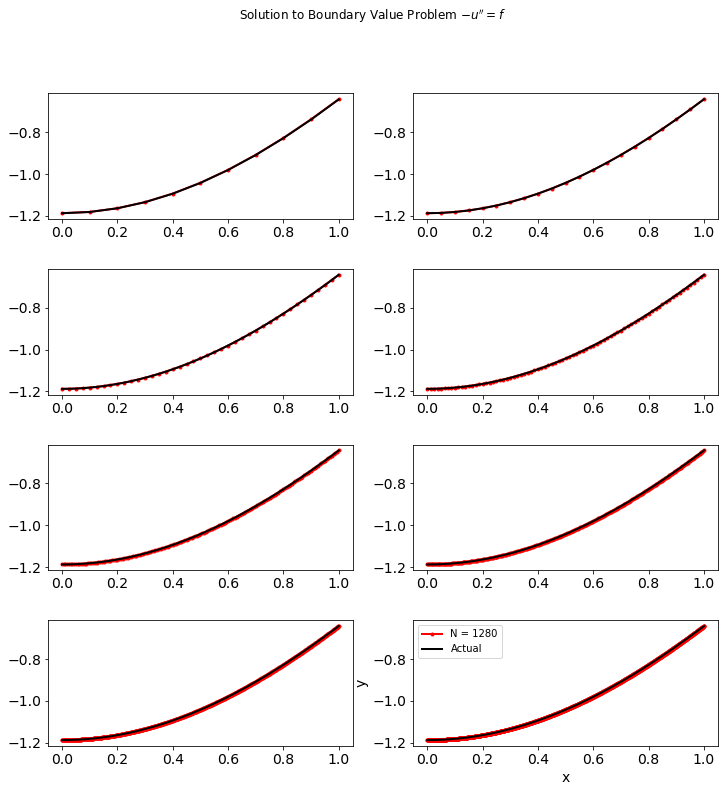

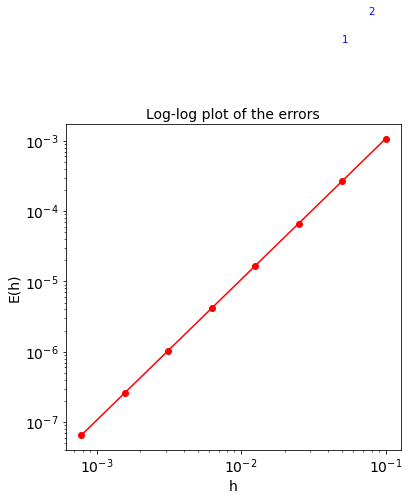

In [26]:
#code for 2a

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import numpy as np
import time

from tabulate import tabulate
from mpltools import annotation
from math import *


NSamples = 8
colors   = cm.rainbow(np.linspace(0, 1, NSamples))
error    = np.zeros(NSamples)
n        = np.zeros(NSamples,dtype='int')
h        = np.zeros(NSamples)
alpha    = np.zeros(NSamples)
fig, ax  = plt.subplots(nrows=floor(NSamples/2),ncols=2,figsize=(12,12))

plt.subplots_adjust(hspace=.4)
fig.suptitle('Solution to Boundary Value Problem $-u\'\'=f$')

for k in range(NSamples):
    n[k]            = 10*2**k
    h[k]            = 1/n[k]
    x               = np.arange(n[k]+1) * h[k]
    e               = np.ones(n[k]+1)
    y               = np.zeros(n[k]+1)
    A               = sp.spdiags(np.array([-e/(h[k]**2), 2*e/(h[k]**2) + (2 + np.cos(np.pi*x)), 
                                     -e/(h[k]**2)]), np.array([-1, 0, 1]), n[k]+1, n[k]+1, format = 'csr')
    sol             = -np.cos(x)/np.sin(1)                       #u(x), Actual Solution
    b               = (-np.cos(x)/np.sin(1))*(3+np.cos(np.pi*x)) #f(x)
    A[0,1]          = -2/h[k]**2
    A[n[k], n[k]-1] = -2/h[k]**2
    b[n[k]]         = b[n[k]] + 2/h[k]
    
    start = time.time()
    
    # Elimination step
    y = spla.spsolve(A, b)
    
    end = time.time()
    
    error[k] = max(abs(y - sol))
    
    if k > 0:
        alpha[k] = log(error[k]/error[k-1])/log(h[k]/h[k-1])
    ax[floor(k/2),k%2].plot(x,y,'.-',color='red', label='N = %i' %n[k],lw=2)
    ax[floor(k/2),k%2].plot(x,sol,'-',color='black', label='Actual',lw=2)
    
ax[floor(k/2),k%2].legend(loc='best')
ax[floor(k/2),k%2].set_xlabel('x',fontsize=14)
ax[floor(k/2),k%2].set_ylabel('y',fontsize=14)
plt.savefig('BVP.png', bbox_inches='tight')
results = [(h[i], error[i], alpha[i]) for i in range(NSamples)]

print(tabulate(results, headers=["h", "Error", "alpha"], floatfmt=(".5e",".12e",".5e"),tablefmt="presto"))
print(tabulate(results, headers=["h", "Error", "alpha"], floatfmt=(".5e",".12e",".5e"),tablefmt="latex"))

fig, ax = plt.subplots(figsize=(6,6))
ax.loglog(h,error,'or-')
annotation.slope_marker((4e-2, 4.e-2), (2, 1), ax=ax,text_kwargs={'color': 'blue'},poly_kwargs={'facecolor': 'blue'})

ax.set_xlabel('h',fontsize=14)
ax.set_ylabel('E(h)',fontsize=14)
ax.set_title('Log-log plot of the errors',fontsize=14)

plt.rc('xtick', labelsize=14) # fontsize of the tick labels
plt.rc('ytick', labelsize=14)
plt.savefig('BVP-errors.png', bbox_inches='tight')
plt.show()

0
10
1
20
2
40
3
80
4
160
5
320
           h |              Error |       alpha
-------------+--------------------+-------------
 1.00000e-01 | 4.836600707687e-02 | 0.00000e+00
 5.00000e-02 | 2.571285636775e-02 | 9.11504e-01
 2.50000e-02 | 1.326789780536e-02 | 9.54550e-01
 1.25000e-02 | 6.740738288939e-03 | 9.76961e-01
 6.25000e-03 | 3.397576854492e-03 | 9.88400e-01
 3.12500e-03 | 1.705655462233e-03 | 9.94180e-01
\begin{tabular}{rrr}
\hline
           h &              Error &       alpha \\
\hline
 1.00000e-01 & 4.836600707687e-02 & 0.00000e+00 \\
 5.00000e-02 & 2.571285636775e-02 & 9.11504e-01 \\
 2.50000e-02 & 1.326789780536e-02 & 9.54550e-01 \\
 1.25000e-02 & 6.740738288939e-03 & 9.76961e-01 \\
 6.25000e-03 & 3.397576854492e-03 & 9.88400e-01 \\
 3.12500e-03 & 1.705655462233e-03 & 9.94180e-01 \\
\hline
\end{tabular}


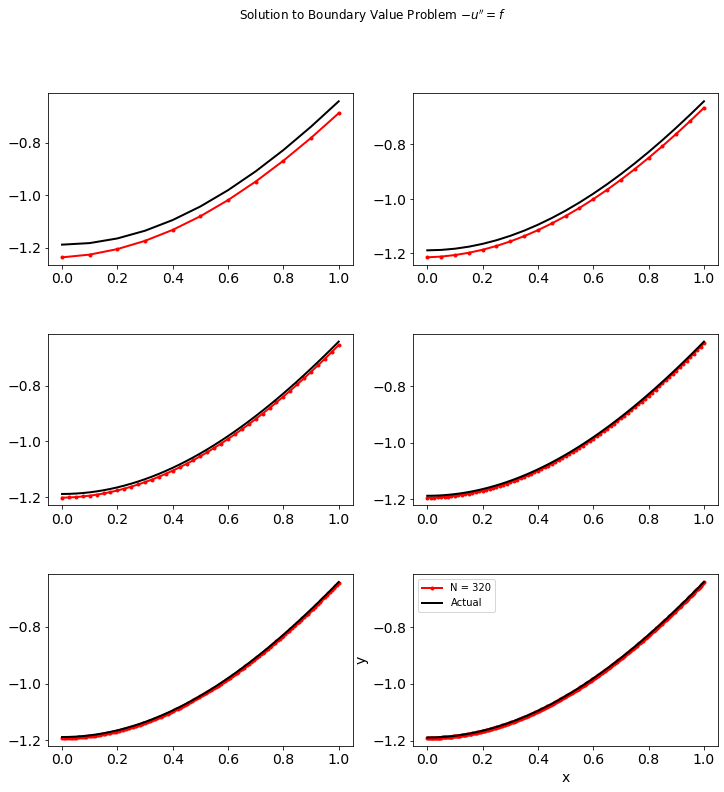

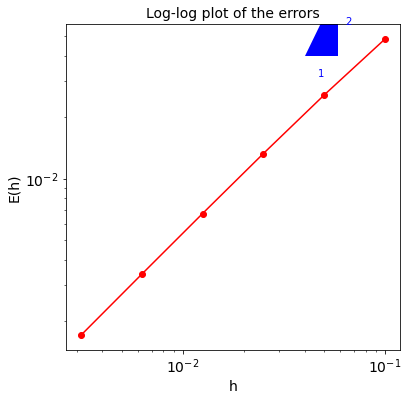

In [29]:
#code for 2b

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import numpy as np
import time

from tabulate import tabulate
from mpltools import annotation
from math import *


NSamples = 6
colors   = cm.rainbow(np.linspace(0, 1, NSamples))
error    = np.zeros(NSamples)
n        = np.zeros(NSamples,dtype='int')
h        = np.zeros(NSamples)
alpha    = np.zeros(NSamples)
fig, ax  = plt.subplots(nrows=floor(NSamples/2),ncols=2,figsize=(12,12))

plt.subplots_adjust(hspace=.4)
fig.suptitle('Solution to Boundary Value Problem $-u\'\'=f$')
    
def CG(A, b, nk):
    print(nk)
    x         = np.zeros(len(b))
    p         = []
    r         = []
    tolerance = 10**-5
    p.append(b)
    r.append(b)
    
    while True:
        t_k    = (r[-1].dot(r[-1]))/(p[-1].dot(A.dot(p[-1])))
        x      = x + t_k * p[-1]
        r_temp = r[-1] - t_k*(A.dot(p[-1]))
        s_k    = (r_temp.dot(r_temp))/(r[-1].dot(r[-1]))
        p.append(r_temp + s_k*p[-1])
        r.append(r_temp)
        if np.linalg.norm(b - A.dot(x)) < tolerance:
            break
    return x
    
for k in range(NSamples):
    print(k)
    n[k]            = 10*2**k
    h[k]            = 1/n[k]
    x               = np.arange(n[k]+1) * h[k]
    e               = np.ones(n[k]+1)
    y               = np.zeros(n[k]+1)
    A               = sp.spdiags(np.array([-e/(h[k]**2), 2*e/(h[k]**2) + (2 + np.cos(np.pi*x)), 
                                     -e/(h[k]**2)]), np.array([-1, 0, 1]), n[k]+1, n[k]+1, format = 'csr').toarray()
    sol             = -np.cos(x)/np.sin(1)                            #u(x), Actual Solution
    b               = -(np.cos(x)/np.sin(1))*(3+np.cos(np.pi*x))      #f(x)
    A[0][0]         = -A[0][1]+(2+np.cos(np.pi*x[0]))
    A[n[k]][n[k]]   = -A[n[k]][n[k]-1] + (2 + np.cos(np.pi*x[n[k]]))
    b[n[k]]         = b[n[k]] + 1/h[k]
    
    start = time.time()
    
    # Elimination step
    y = CG(A, b, n[k])
#     y = spla.spsolve(A, b)
    
    end = time.time()
    
    error[k] = max(abs(y - sol))
    
    if k > 0:
        alpha[k] = log(error[k]/error[k-1])/log(h[k]/h[k-1])
    ax[floor(k/2),k%2].plot(x,y,'.-',color='red', label='N = %i' %n[k],lw=2)
    ax[floor(k/2),k%2].plot(x,sol,'-',color='black', label='Actual',lw=2)
    
ax[floor(k/2),k%2].legend(loc='best')
ax[floor(k/2),k%2].set_xlabel('x',fontsize=14)
ax[floor(k/2),k%2].set_ylabel('y',fontsize=14)
plt.savefig('BVP.png', bbox_inches='tight')
results = [(h[i], error[i], alpha[i]) for i in range(NSamples)]

print(tabulate(results, headers=["h", "Error", "alpha"], floatfmt=(".5e",".12e",".5e"),tablefmt="presto"))
print(tabulate(results, headers=["h", "Error", "alpha"], floatfmt=(".5e",".12e",".5e"),tablefmt="latex"))

fig, ax = plt.subplots(figsize=(6,6))
ax.loglog(h,error,'or-')
annotation.slope_marker((4e-2, 4.e-2), (2, 1), ax=ax,text_kwargs={'color': 'blue'},poly_kwargs={'facecolor': 'blue'})

ax.set_xlabel('h',fontsize=14)
ax.set_ylabel('E(h)',fontsize=14)
ax.set_title('Log-log plot of the errors',fontsize=14)

plt.rc('xtick', labelsize=14) # fontsize of the tick labels
plt.rc('ytick', labelsize=14)
plt.savefig('BVP-errors.png', bbox_inches='tight')
plt.show()